In [6]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import nbimporter
from data_loader import load_data

In [11]:
IMG_SIZE = (224, 224)  # ResNet50 default input size
BATCH_SIZE = 64
EPOCHS = 50
input_shape = (224, 224, 3)  # or your desired image size


In [8]:
# Load data (using your existing function)
train_gen, val_gen, test_gen,_= load_data(
    train_path="C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/train",
    valid_path="C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/valid",
    test_path="C:/Users/Nouran/.cache/kagglehub/datasets/gpiosenka/musical-instruments-image-classification/versions/1/test",
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=42
)


Found 4793 images belonging to 30 classes.
Found 150 images belonging to 30 classes.
Found 150 images belonging to 30 classes.


In [9]:
# Number of classes (from your loaded generators)
NUM_CLASSES = len(train_gen.class_indices)
print(f"Number of classes: {NUM_CLASSES}")

Number of classes: 30


In [13]:

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
predictions = Dense(NUM_CLASSES, activation='softmax')(x)



In [14]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,892,702 (14.85 MB)

 Trainable params: 663,838 (2.53 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [15]:
# Callbacks to prevent overfitting
callbacks = [
 EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
 ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

In [16]:
# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // BATCH_SIZE,
    validation_data=val_gen,
    validation_steps=val_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks
)

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.0507 - loss: 3.9371 - val_accuracy: 0.3906 - val_loss: 2.7032 - learning_rate: 1.0000e-04
Epoch 2/50
 1/74 ━━━━━━━━━━━━━━━━━━━━ 1:14 1s/step - accuracy: 0.1406 - loss: 3.0758

C:\Users\Nouran\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.1406 - loss: 3.0758 - val_accuracy: 0.3906 - val_loss: 2.6950 - learning_rate: 1.0000e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.1919 - loss: 2.9538 - val_accuracy: 0.6406 - val_loss: 1.9463 - learning_rate: 1.0000e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.2031 - loss: 2.8355 - val_accuracy: 0.6484 - val_loss: 1.9370 - learning_rate: 1.0000e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/step - accuracy: 0.3347 - loss: 2.4438 - val_accuracy: 0.7812 - val_loss: 1.1932 - learning_rate: 1.0000e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4531 - loss: 2.0648 - val_accuracy: 0.7812 - val_loss: 1.1855 - learning_rate: 1.0000e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.4677 - loss: 1.9470 - val_accuracy: 0.8906 - val_loss: 0.6950 - learning_rate: 1.0000e-04
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5156 - loss: 1.6

In [17]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze the first 100 layers
    layer.trainable = False

In [18]:
# Recompile the model for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Fine-tune the model
fine_tune_history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // BATCH_SIZE,
    validation_data=val_gen,
    validation_steps=val_gen.samples // BATCH_SIZE,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 383s 5s/step - accuracy: 0.8898 - loss: 0.3622 - val_accuracy: 0.9844 - val_loss: 0.0425 - learning_rate: 1.0000e-05
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8594 - loss: 0.3665 - val_accuracy: 0.9844 - val_loss: 0.0426 - learning_rate: 1.0000e-05
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 347s 5s/step - accuracy: 0.8934 - loss: 0.3507 - val_accuracy: 0.9766 - val_loss: 0.0441 - learning_rate: 1.0000e-05
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9062 - loss: 0.3192 - val_accuracy: 0.9766 - val_loss: 0.0440 - learning_rate: 1.0000e-05
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 338s 5s/step - accuracy: 0.8864 - loss: 0.3553 - val_accuracy: 0.9766 - val_loss: 0.0453 - learning_rate: 1.0000e-05
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8281 - loss: 0.5059 - val_accuracy: 0.9766 - val_loss: 0.0453 - learning_rate: 1.0000e-05
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.8842 

In [25]:
# === Step 5: Final evaluation ===
loss_fine, accuracy_fine = model.evaluate(test_gen)
print(f" Final Test Accuracy after fine-tuning: {accuracy_fine * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 842ms/step - accuracy: 0.9861 - loss: 0.0564
 Final Test Accuracy after fine-tuning: 98.00%


In [26]:
import numpy as np
import random, os
from tensorflow.keras.preprocessing import image

def test_random_image(model, test_gen, img_size=(224, 224)):
    import matplotlib.pyplot as plt

    # Get test directory from generator
    test_path = test_gen.directory
    class_names = list(test_gen.class_indices.keys())

    # Pick a random class and image
    random_class = random.choice(os.listdir(test_path))
    random_class_dir = os.path.join(test_path, random_class)
    random_img_file = random.choice(os.listdir(random_class_dir))
    random_img_path = os.path.join(random_class_dir, random_img_file)

    # Load and preprocess the image
    img = image.load_img(random_img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if needed

    # Predict
    preds = model.predict(img_array)
    predicted_index = np.argmax(preds, axis=1)[0]
    predicted_label = class_names[predicted_index]

    # Show the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}\nActual: {random_class}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


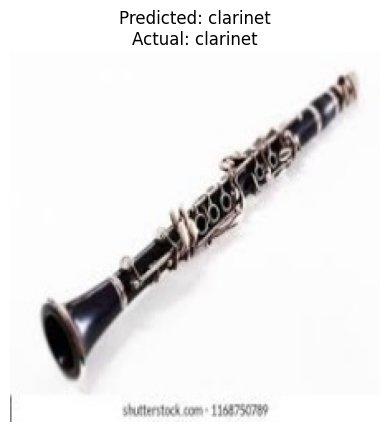

In [47]:
# Test the function
test_random_image(model, test_gen, img_size=(224, 224))

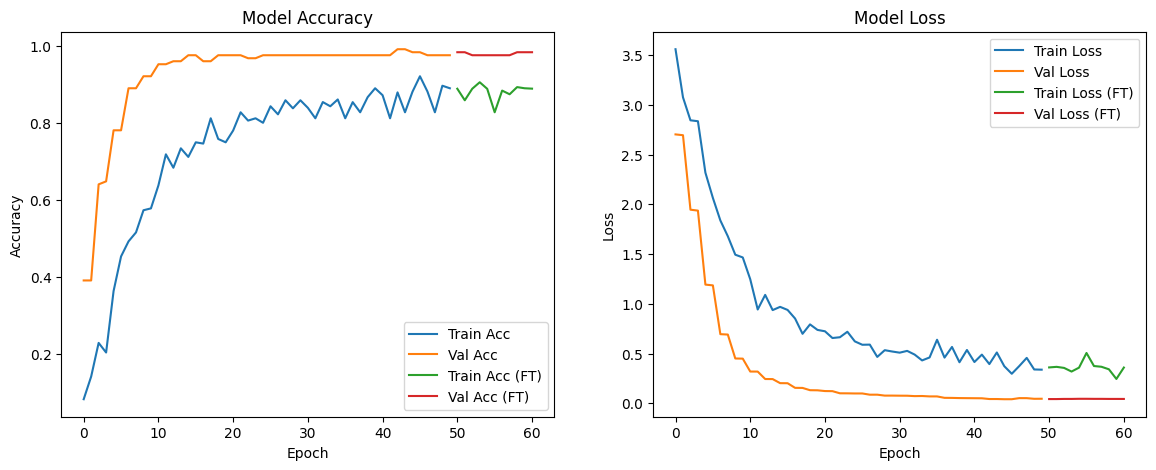

In [ ]:
import matplotlib.pyplot as plt

# 1. Training & Validation Accuracy/Loss Curves
def plot_training_history(history, fine_tune_history=None):
    plt.figure(figsize=(14, 5))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    if fine_tune_history:
        offset = len(history.history['accuracy'])
        plt.plot(range(offset, offset + len(fine_tune_history.history['accuracy'])), fine_tune_history.history['accuracy'], label='Train Acc (FT)')
        plt.plot(range(offset, offset + len(fine_tune_history.history['val_accuracy'])), fine_tune_history.history['val_accuracy'], label='Val Acc (FT)')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    if fine_tune_history:
        offset = len(history.history['loss'])
        plt.plot(range(offset, offset + len(fine_tune_history.history['loss'])), fine_tune_history.history['loss'], label='Train Loss (FT)')
        plt.plot(range(offset, offset + len(fine_tune_history.history['val_loss'])), fine_tune_history.history['val_loss'], label='Val Loss (FT)')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history, fine_tune_history)


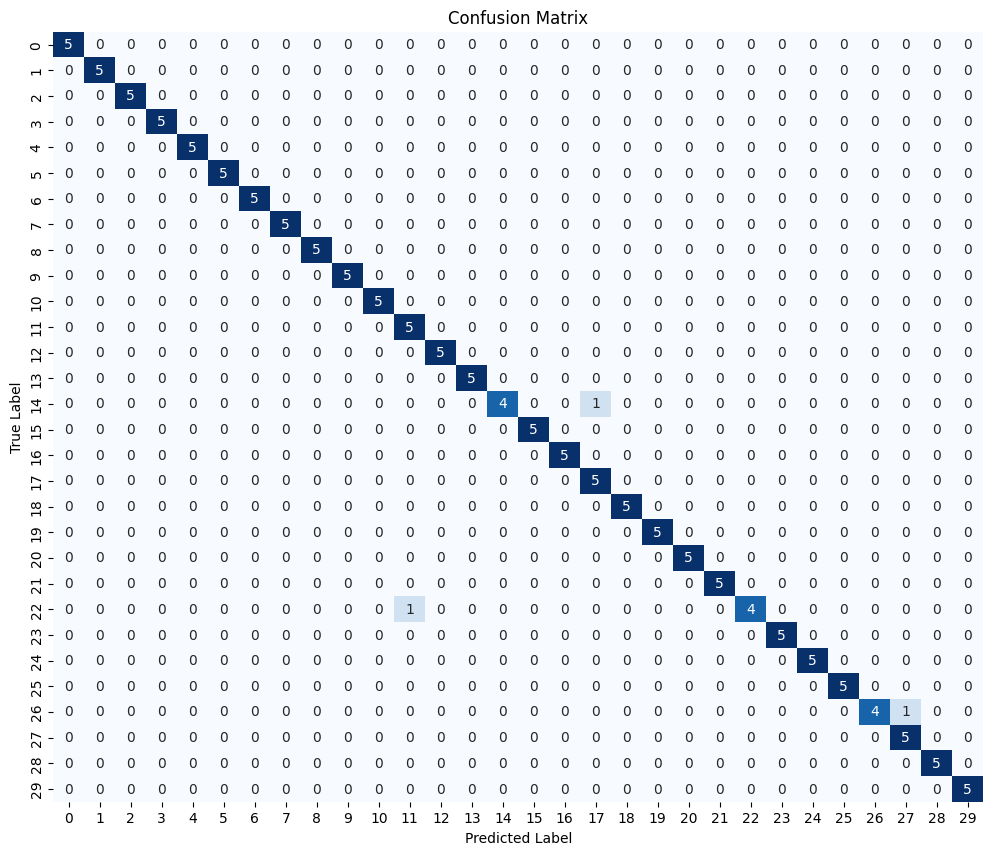

In [50]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

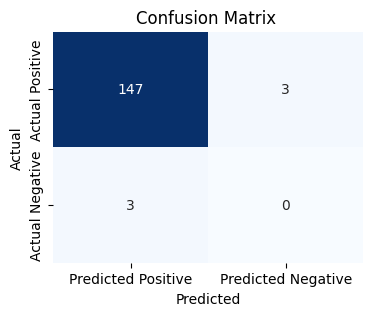

In [53]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate TP, TN, FP, FN from the multi-class confusion matrix
TP = np.trace(cm)
FP = np.sum(cm) - TP
FN = FP  # In multi-class, sum of off-diagonal elements is both FP and FN
TN = 0   # For multi-class, TN is not well-defined, but for binary-style, set to 0

# For a 2x2 confusion matrix: [[TP, FP], [FN, TN]]
cm_2x2 = np.array([[TP, FP],
                   [FN, TN]])

plt.figure(figsize=(4, 3))
sns.heatmap(cm_2x2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
#save the model
model.save('musical_instruments_model_Mobile_Net.h5')

In [39]:
# load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('musical_instruments_model_Mobile_Net.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


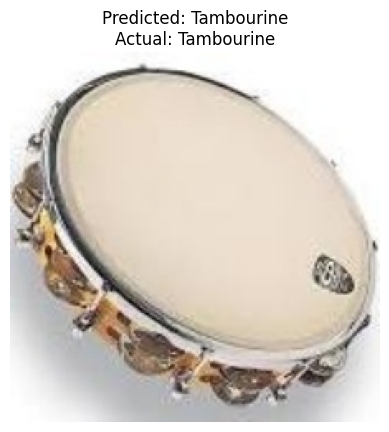

In [56]:
# Test the loaded model
test_random_image(loaded_model, test_gen, img_size=(224, 224))